In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import seaborn as sns

# Exercises for Tuesday
***
# Exercise 1 : Linear regression

Load the dataset `load_diabetes` from sklearn library and train and test a linear regression model on this data set. \

**NB:** Full pipeline of a Data Science project is waited for this exercise.

In [2]:
# Load the dataset
from sklearn.datasets import load_diabetes

diabetes = load_diabetes(as_frame=True)
X = diabetes.data
y = diabetes.target

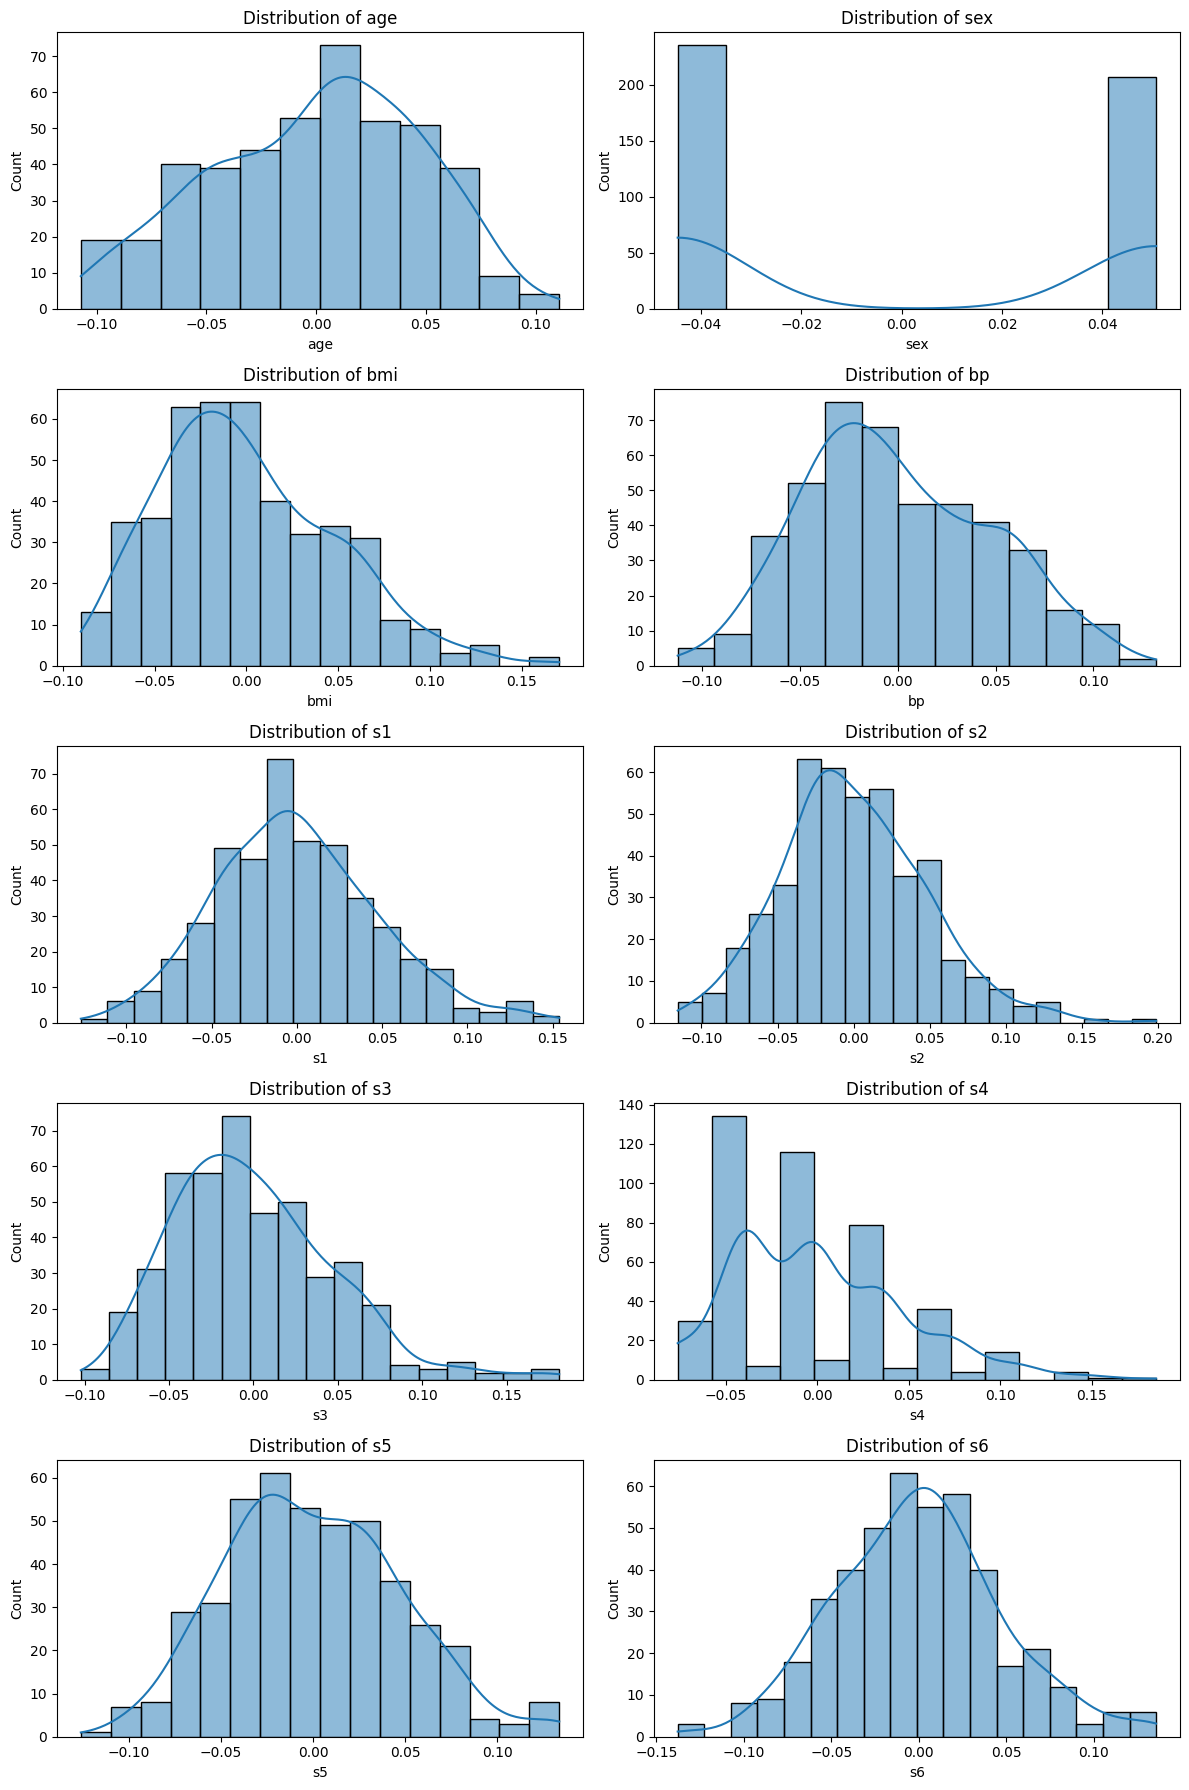

In [3]:
# Plot the distribution of the each feature in X
fig, axs = plt.subplots(5, 2, figsize=(12, 18))

for idx, feature in enumerate(diabetes.feature_names):
    row, col = divmod(idx, 2)
    sns.histplot(X[feature], ax=axs[row, col], kde=True)
    axs[row, col].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

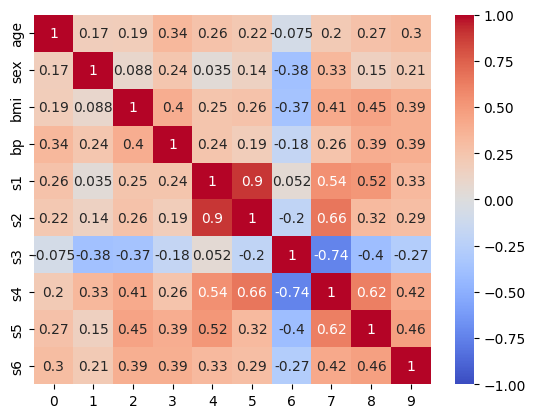

In [4]:
# Correlation matrix of the different features
corr_matrix = np.corrcoef(X, rowvar=False)
sns.heatmap(corr_matrix, 
            annot = True, 
            cmap = 'coolwarm', 
            vmin = -1, 
            vmax = 1,
            yticklabels = diabetes.feature_names)
plt.show()


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_pca = pca.fit_transform(X[['s1', 's2']])
print(pca.components_)

[[0.70710678 0.70710678]]


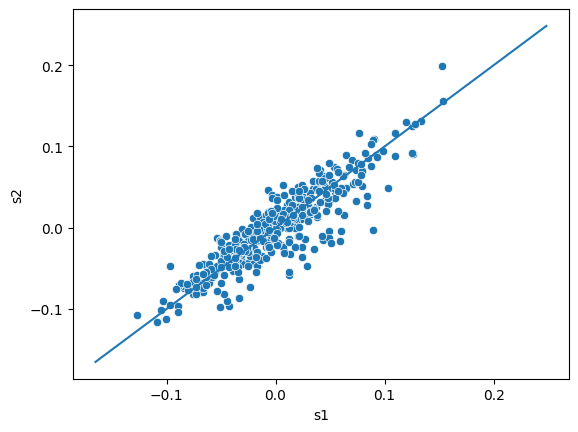

In [6]:
# Plot correlation of s1 and s2 columns
sns.scatterplot(x='s1', y='s2', data=X)
sns.lineplot(x=X_pca[:, 0], y=X_pca[:, 0])
plt.show()

In [7]:
X_new = X.drop('s1', axis = 1, inplace = False)
X_new

,age,sex,bmi,bp,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [8]:
from sklearn.metrics import r2_score, \
                            mean_squared_error, \
                            mean_absolute_percentage_error, \
                            root_mean_squared_error, \
                            mean_absolute_error
def print_metrics(y, y_pred):
    print(f'MAE: {mean_absolute_error(y, y_pred)}')
    print(f'MSE: {mean_squared_error(y, y_pred)}')
    print(f'RMSE: {root_mean_squared_error(y, y_pred)}')
    print(f'r2_score: {r2_score(y, y_pred)}')
    print(f'MAPE: {mean_absolute_percentage_error(y, y_pred)}')

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
print('---- TRAIN ----')
print_metrics(y_train, model.predict(X_train))
print('---- TEST ----')
print_metrics(y_test, model.predict(X_test))


---- TRAIN ----
MAE: 43.75543846973715
MSE: 2904.3076096849904
RMSE: 53.89162838219857
r2_score: 0.5220346653595116
MAPE: 0.39053037635191185
---- TEST ----
MAE: 42.87093779436123
MSE: 2874.357645847139
RMSE: 53.6130361558375
r2_score: 0.45747917721459874
MAPE: 0.3725464128609567


***
# Exercise 2 : Ridge and Lasso regressions

**Question 1 :** Still using the `load_diabetes` dataset, build a polynomial model by adding and selecting the different polynomial features. 

In [10]:
# Your code here
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_new)
X_poly.shape

(442, 55)

**Question 2 :** Train and test a model using Ridge regression technique. 


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

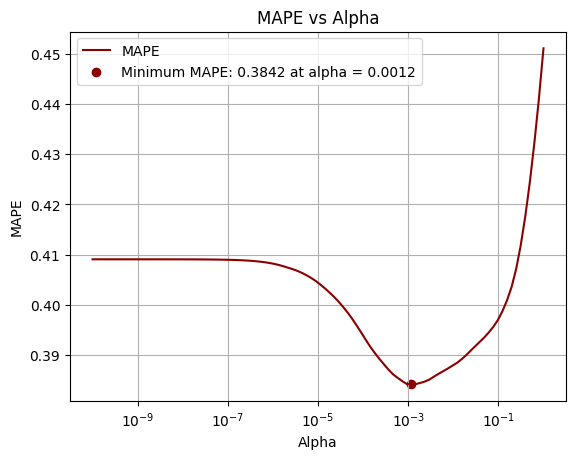

In [ ]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge

alphas = np.logspace(-10, 0, 100)
MAPE = []
for alpha in alphas:
    # Cross validation - Kfold
    kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
    MAPE_alpha = []
    for train_index, val_index in kf.split(X_poly):
        X_split_train, X_split_val = X_poly[train_index], X_poly[val_index]
        y_split_train, y_split_val = y[train_index], y[val_index]
        model = Ridge(alpha=alpha)
        model.fit(X_split_train, y_split_train)
        y_pred = model.predict(X_split_val)
        MAPE_alpha.append(mean_absolute_percentage_error(y_split_val, y_pred))
    MAPE.append(np.mean(MAPE_alpha))

plt.plot(alphas, MAPE, color = 'darkred', label = 'MAPE')
plt.scatter(alphas[np.argmin(MAPE)], 
            np.min(MAPE), 
            color = 'darkred', 
            label = f'Minimum MAPE: {np.min(MAPE):.4f} at alpha = {alphas[np.argmin(MAPE)]:.4f}')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MAPE')
plt.title('MAPE vs Alpha')
plt.grid(True)
plt.legend()
plt.show()


**Question 3 :** Train and test a model using Lasso regression technique.

In [13]:
# Your code here
